## COVID-19 Data Analysis

Jay Urbain, PhD

References:  
2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE   
https://github.com/CSSEGISandData/COVID-19



In [108]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false
}

<IPython.core.display.Javascript object>

In [1]:
## Import Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
#%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
plt.rcParams['figure.figsize'] = [15, 5]
from IPython import display
from ipywidgets import interact, widgets
import seaborn as sns



#### Data

The data is hosted by John Hopkins University:  
https://github.com/CSSEGISandData/COVID-19

There are three files that contain total confirmed cases, deaths and recoveries.

In [2]:
## Read Data for Cases, Deaths and Recoveries
df_confirmed_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
df_deaths_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
df_recovered_raw=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')


In [3]:
df_confirmed_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,50,50,53,59,70,75,82,114,147,177
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,502,511,581,639,639,701,773,839,825,878
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,150,150,160,178,178,200,212,226,243,266
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,99,117,129,149,149,197,238,428,566,673


#### Data Preprocessing

Unpivot the data

In [4]:
# melt df into correct shape 
# index
def unpivot_data(df_raw):
    df_unpivot=df_raw.melt(id_vars=['Province/State','Country/Region','Lat','Long'], value_name='Cases', var_name='Date')
    df_unpivot['Date'] = pd.to_datetime(df_unpivot['Date'])
    df_unpivot=df_unpivot.set_index(['Date'])
    return df_unpivot 

# Unpivot datasets datasets
df_confirmed=unpivot_data(df_confirmed_raw)
df_deaths=unpivot_data(df_deaths_raw)
df_recovered=unpivot_data(df_recovered_raw)


In [5]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,Cases
Date,,,,,
2020-01-22,NaN,Thailand,15.0000,101.0000,2
2020-01-22,NaN,Japan,36.0000,138.0000,2
2020-01-22,NaN,Singapore,1.2833,103.8333,0
2020-01-22,NaN,Nepal,28.1667,84.2500,0
2020-01-22,NaN,Malaysia,2.5000,112.5000,0


In [6]:
df_deaths.head()

,Province/State,Country/Region,Lat,Long,Cases
Date,,,,,
2020-01-22,NaN,Thailand,15.0000,101.0000,0
2020-01-22,NaN,Japan,36.0000,138.0000,0
2020-01-22,NaN,Singapore,1.2833,103.8333,0
2020-01-22,NaN,Nepal,28.1667,84.2500,0
2020-01-22,NaN,Malaysia,2.5000,112.5000,0


In [7]:
df_recovered.head()

,Province/State,Country/Region,Lat,Long,Cases
Date,,,,,
2020-01-22,NaN,Thailand,15.0000,101.0000,0
2020-01-22,NaN,Japan,36.0000,138.0000,0
2020-01-22,NaN,Singapore,1.2833,103.8333,0
2020-01-22,NaN,Nepal,28.1667,84.2500,0
2020-01-22,NaN,Malaysia,2.5000,112.5000,0


List countries

In [8]:
np.sort(df_confirmed['Country/Region'].unique())

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cruise Ship', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt',
       'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia', 'Finland',
       'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Greenland', 'Guatemala', 'Guernsey', 'Guinea', 'Guyana',
       'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan

In [9]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,Cases
Date,,,,,
2020-01-22,NaN,Thailand,15.0000,101.0000,2
2020-01-22,NaN,Japan,36.0000,138.0000,2
2020-01-22,NaN,Singapore,1.2833,103.8333,0
2020-01-22,NaN,Nepal,28.1667,84.2500,0
2020-01-22,NaN,Malaysia,2.5000,112.5000,0


In [52]:
df_confirmed[df_confirmed['Country/Region'] == 'France']

,Province/State,Country/Region,Lat,Long,Cases
Date,,,,,
2020-01-22,France,France,46.2276,2.2137,0
2020-01-22,St Martin,France,18.0708,-63.0501,0
2020-01-22,Saint Barthelemy,France,17.9000,-62.8333,0
2020-01-22,French Polynesia,France,-17.6797,149.4068,0
2020-01-22,French Guiana,France,3.9339,-53.1258,0
...,...,...,...,...,...
2020-03-17,French Polynesia,France,-17.6797,149.4068,3
2020-03-17,French Guiana,France,3.9339,-53.1258,11
2020-03-17,Mayotte,France,-12.8275,45.1662,1


In [51]:
df_confirmed[df_confirmed['Country/Region'] == 'United Kingdom']

,Province/State,Country/Region,Lat,Long,Cases
Date,,,,,
2020-01-22,Channel Islands,United Kingdom,49.3723,-2.3644,0
2020-01-22,Gibraltar,United Kingdom,36.1408,-5.3536,0
2020-01-22,United Kingdom,United Kingdom,55.3781,-3.4360,0
2020-01-22,Cayman Islands,United Kingdom,19.3133,-81.2546,0
2020-01-23,Channel Islands,United Kingdom,49.3723,-2.3644,0
...,...,...,...,...,...
2020-03-16,Cayman Islands,United Kingdom,19.3133,-81.2546,1
2020-03-17,Channel Islands,United Kingdom,49.3723,-2.3644,6
2020-03-17,Gibraltar,United Kingdom,36.1408,-5.3536,3


In [40]:
df_confirmed_us = df_confirmed[df_confirmed['Country/Region'] == 'US']
df_confirmed_us

,Province/State,Country/Region,Lat,Long,Cases
Date,,,,,
2020-01-22,Washington,US,47.4009,-121.4905,0
2020-01-22,New York,US,42.1657,-74.9481,0
2020-01-22,California,US,36.1162,-119.6816,0
2020-01-22,Massachusetts,US,42.2302,-71.5301,0
2020-01-22,Diamond Princess,US,35.4437,139.6380,0
...,...,...,...,...,...
2020-03-17,"New Castle, DE",US,39.5393,-75.6674,0
2020-03-17,Alabama,US,32.3182,-86.9023,39
2020-03-17,Puerto Rico,US,18.2208,-66.5901,5


In [42]:
df_confirmed_us_total = pd.DataFrame(df_confirmed_us.groupby(df_confirmed_us.index)['Cases'].sum(), columns=['Cases'])
df_confirmed_us_total['Country/Region'] = 'US Total'
df_confirmed_us_total[:20]

,Cases,Country/Region
Date,,
2020-01-22,1,US Total
2020-01-23,1,US Total
2020-01-24,2,US Total
2020-01-25,2,US Total
2020-01-26,5,US Total
2020-01-27,5,US Total
2020-01-28,5,US Total
2020-01-29,5,US Total
2020-01-30,5,US Total


In [53]:
df_confirmed = df_confirmed.append(df_confirmed_us_total)
df_confirmed

,Cases,Country/Region,Lat,Long,Province/State
Date,,,,,
2020-01-22,2,Thailand,15.0000,101.0000,NaN
2020-01-22,2,Japan,36.0000,138.0000,NaN
2020-01-22,0,Singapore,1.2833,103.8333,NaN
2020-01-22,0,Nepal,28.1667,84.2500,NaN
2020-01-22,0,Malaysia,2.5000,112.5000,NaN
...,...,...,...,...,...
2020-03-13,2179,US Total,NaN,NaN,NaN
2020-03-14,2727,US Total,NaN,NaN,NaN
2020-03-15,3499,US Total,NaN,NaN,NaN


Cap date range to today to eliminate spurious data

In [54]:
from datetime import date
max_date = date.today()
max_date

datetime.date(2020, 3, 18)

In [55]:
df_confirmed.index.values.max(), df_confirmed.index.values.min()

(numpy.datetime64('2020-03-17T00:00:00.000000000'),
 numpy.datetime64('2020-01-22T00:00:00.000000000'))

In [56]:
min_date_string = np.datetime_as_string(df_confirmed.index.values.min(), unit='D')
max_date_string = np.datetime_as_string(df_confirmed.index.values.max(), unit='D')

In [90]:
df_confirmed.head()

,Cases,Country/Region,Lat,Long,Province/State
Date,,,,,
2020-01-22,2,Thailand,15.0000,101.0000,NaN
2020-01-22,2,Japan,36.0000,138.0000,NaN
2020-01-22,0,Singapore,1.2833,103.8333,NaN
2020-01-22,0,Nepal,28.1667,84.2500,NaN
2020-01-22,0,Malaysia,2.5000,112.5000,NaN


#### US Confirmed Cases

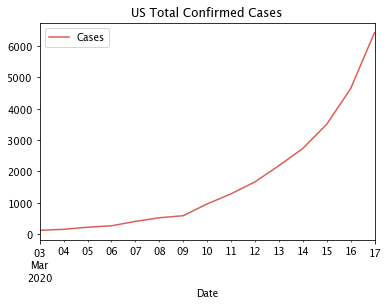

In [100]:
df_country = df_confirmed.loc[(df_confirmed['Country/Region'] == 'US Total') & (df_confirmed['Cases'] >= min_cases)]
df_country.plot(y='Cases', title='US Total Confirmed Cases');

#### Plots of Confirmed Cases, Deaths, and Recovered COVID-19 Patients

US and Eurpean like countries

In [101]:
%matplotlib inline

def plot_countries(df, countries, min_cases=50, ls='-', col='Cases'):
    for country in countries:
        df_country = df.loc[(df['Country/Region'] == country) & (df['Cases'] >= min_cases)]
        if len(df_country) == 0:
            continue
        df_country.reset_index()[col].plot(label=country, ls=ls)

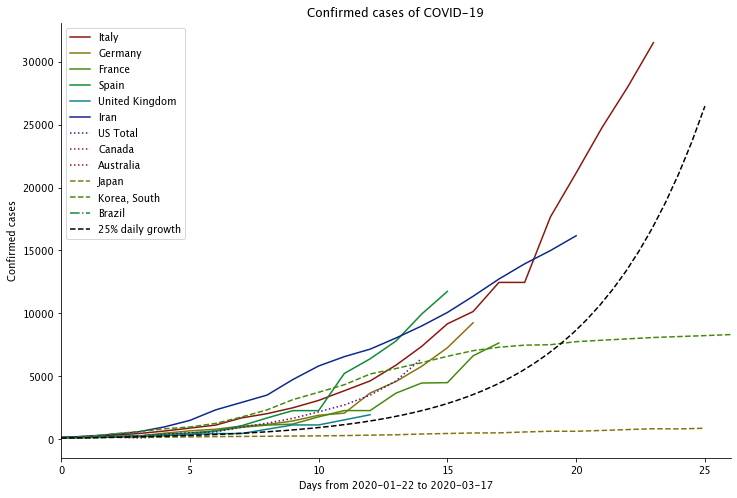

In [221]:
country_groups = [['Italy', 'Germany', 'France', 'Spain', 'United Kingdom', 'Iran'], 
                  ['US Total', 'Canada', 'Australia'], 
                  ['Japan', 'Korea, South'], 
                  ['Argentina', 'Brazil', 'Colombia', 'Mexico']]
line_styles = ['-', ':', '--', '-.']

# sns.set_palette(sns.color_palette("hls", 12))
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
fig, ax = plt.subplots(figsize=(12, 8))

min_cases=100
for countries, ls in zip(country_groups, line_styles):
    plot_countries(df_confirmed, countries, min_cases=min_cases, ls=ls)

x = np.linspace(0, plt.xlim()[1] - 1)
ax.plot(x, 100 * (1.25) ** x, ls='--', color='k', label='25% daily growth')

ax.set(title='Confirmed cases of COVID-19',
       xlabel='Days from {} to {}'.format(min_date_string, max_date_string),
       ylabel='Confirmed cases')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.legend(loc=0)

sns.despine();

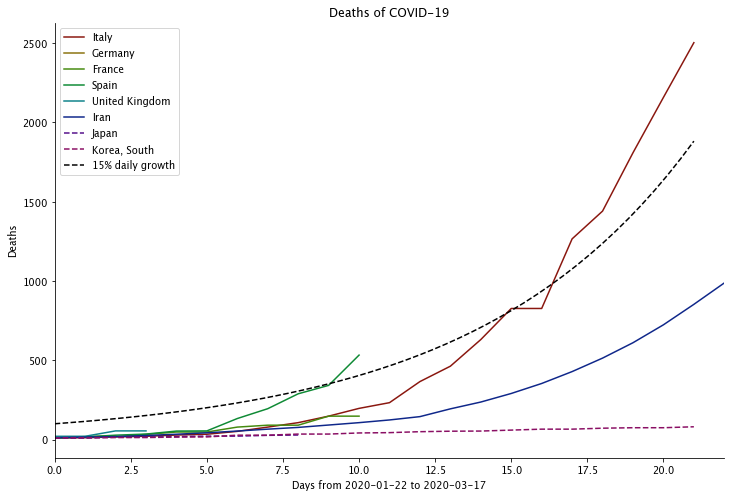

In [224]:
country_groups = [['Italy', 'Germany', 'France', 'Spain', 'United Kingdom', 'Iran'], 
                  ['US Total', 'Canada', 'Australia'], 
                  ['Japan', 'Korea, South'], 
                  ['Argentina', 'Brazil', 'Colombia', 'Mexico']]
line_styles = ['-', ':', '--', '-.']

# sns.set_palette(sns.color_palette("hls", 12))
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
fig, ax = plt.subplots(figsize=(12, 8))

min_cases=10
for countries, ls in zip(country_groups, line_styles):
    plot_countries(df_deaths, countries, min_cases=min_cases, ls=ls)

x = np.linspace(0, plt.xlim()[1] - 1)
ax.plot(x, 100 * (1.15) ** x, ls='--', color='k', label='15% daily growth')

ax.set(title='Deaths of COVID-19',
       xlabel='Days from {} to {}'.format(min_date_string, max_date_string),
       ylabel='Deaths')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.legend(loc=0)

sns.despine();

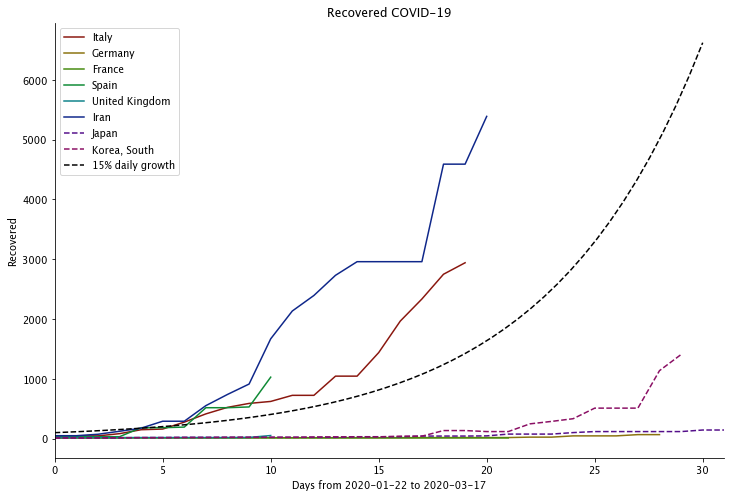

In [225]:
country_groups = [['Italy', 'Germany', 'France', 'Spain', 'United Kingdom', 'Iran'], 
                  ['US Total', 'Canada', 'Australia'], 
                  ['Japan', 'Korea, South'], 
                  ['Argentina', 'Brazil', 'Colombia', 'Mexico']]
line_styles = ['-', ':', '--', '-.']

# sns.set_palette(sns.color_palette("hls", 12))
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
fig, ax = plt.subplots(figsize=(12, 8))

min_cases=10
for countries, ls in zip(country_groups, line_styles):
    plot_countries(df_recovered, countries, min_cases=min_cases, ls=ls)

x = np.linspace(0, plt.xlim()[1] - 1)
ax.plot(x, 100 * (1.15) ** x, ls='--', color='k', label='15% daily growth')

ax.set(title='Recovered COVID-19',
       xlabel='Days from {} to {}'.format(min_date_string, max_date_string),
       ylabel='Recovered')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.legend(loc=0)

sns.despine();

#### Population Stats for Normalization

https://www.macrotrends.net/countries/ranking/population 

In [127]:
pop_dict = {'US Total':331002651,
    'Japan':126476461,
    'Germany':83783942,
    'United Kingdom':67886011,
    'France':6273511,
    'Italy':60461826,
    'Korea, South':51269185,
    'Spain':46754778,
    'Argentina':45195774,
    'Canada':37742154,
    'Australia':25499884,
    'Taiwan':23816775,
    'Iran':8992949,
    'Brazil':209469333,
    'Colombia':49648685,
    'Mexico':126190788
}

In [128]:
pop_dict['US Total']

331002651

#### Plot by normaling cases by population per 1M people

In [135]:
%matplotlib inline

def plot_countries_norm(df, countries, min_cases=50, ls='-', col='Cases'):
    for country in countries:
        df_country = df.loc[(df['Country/Region'] == country) & (df['Cases'] >= min_cases)].copy(deep=True)
        df_country['Cases']=df_country['Cases']*1000000/pop_dict[country]
        if len(df_country) == 0:
            continue
        df_country.reset_index()[col].plot(label=country, ls=ls)
#         df_country.plot(y='Cases', label=country, ls=ls)

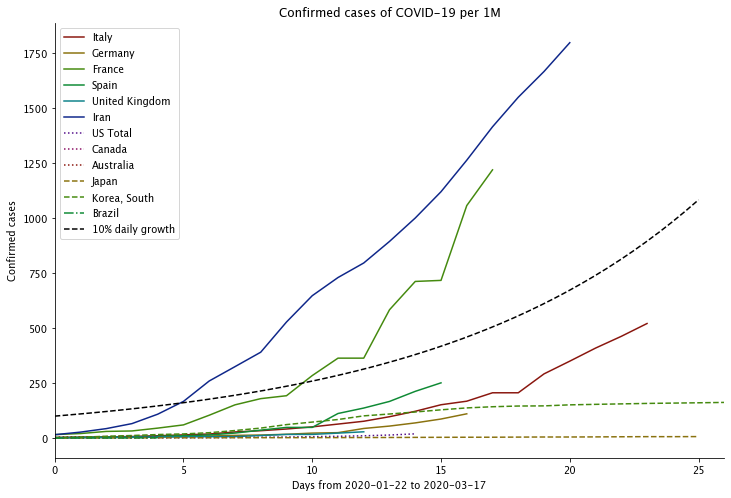

In [228]:
country_groups = [['Italy', 'Germany', 'France', 'Spain', 'United Kingdom', 'Iran'], 
                  ['US Total', 'Canada', 'Australia'], 
                  ['Japan', 'Korea, South'], 
                  ['Argentina', 'Brazil', 'Colombia', 'Mexico']]
line_styles = ['-', ':', '--', '-.']

# sns.set_palette(sns.color_palette("hls", 12))
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
fig, ax = plt.subplots(figsize=(12, 8))

min_cases=100
for countries, ls in zip(country_groups, line_styles):
    plot_countries_norm(df_confirmed, countries, min_cases=min_cases, ls=ls)

x = np.linspace(0, plt.xlim()[1] - 1)
ax.plot(x, 100 * (1.10) ** x, ls='--', color='k', label='10% daily growth')

ax.set(title='Confirmed cases of COVID-19 per 1M',
       xlabel='Days from {} to {}'.format(min_date_string, max_date_string),
       ylabel='Confirmed cases')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.legend(loc=0)

sns.despine();

#### US Confirmed COVID-19 Cases and SPY Index

In [229]:
#!pip install yfinance

[*********************100%***********************]  1 of 1 completed


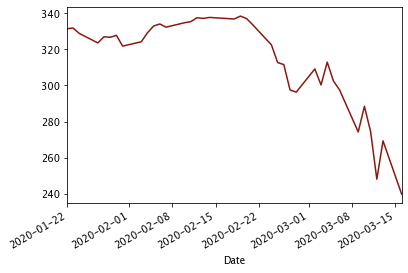

In [180]:
%matplotlib inline
# Import the yfinance. 
import yfinance as yf

# Get the data for the stock AAPL
data = yf.download('SPY', min_date_string, max_date_string)

# Import the plotting library
import matplotlib.pyplot as plt


# Plot the close price of the AAPL
data['Adj Close'].plot()
plt.show()

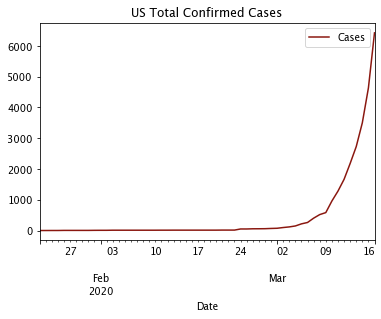

In [182]:
df_country = df_confirmed.loc[(df_confirmed['Country/Region'] == 'US Total') ]
df_country.plot(y='Cases', title='US Total Confirmed Cases');

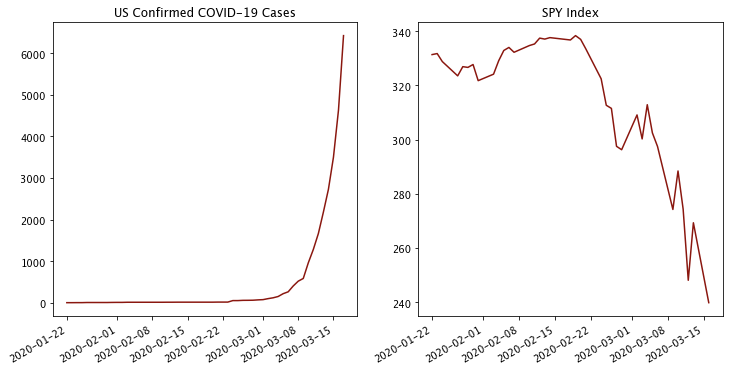

In [183]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.autofmt_xdate()
ax[0].title.set_text('US Confirmed COVID-19 Cases')
ax[0].plot(df_country.index, df_country['Cases'], label='US Cases')
ax[0].xaxis_date()
ax[1].plot(data.index, data['Adj Close'], label='SPY')
ax[1].title.set_text('SPY Index')
ax[1].xaxis_date()
plt.show();

The stock market collapsed way before the COVID-19 confirmed cases. So we can't use COVID-19 to predict the market, but we may be able to use the market to predict COVID-19.

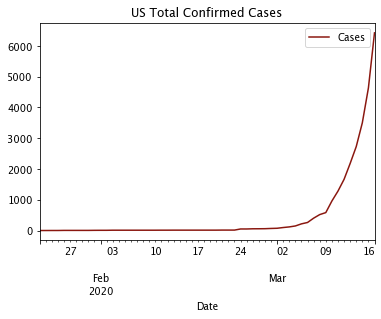

In [186]:
df_country = df_confirmed.loc[(df_confirmed['Country/Region'] == 'US Total') ]
df_country.plot(y='Cases', title='US Total Confirmed Cases');

#### South Korea Confirmed and Recovered COVID-19 Cases

Korea has used aggressive testing

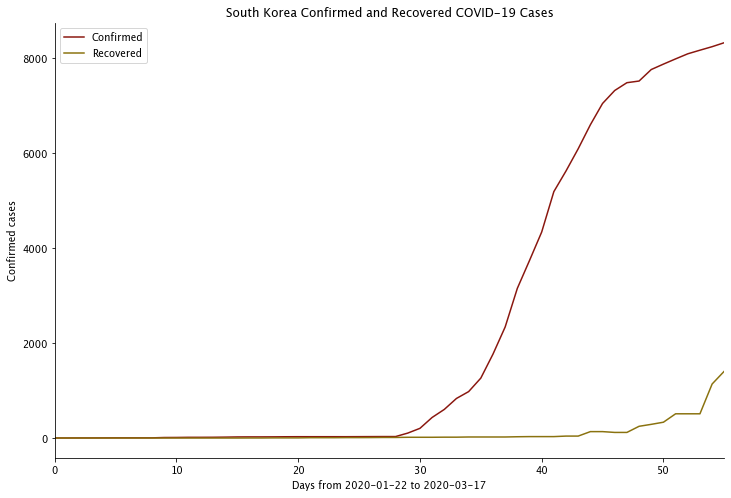

In [195]:
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
fig, ax = plt.subplots(figsize=(12, 8))

df_country = df_confirmed.loc[(df_confirmed['Country/Region'] == 'Korea, South') ]
df_country.reset_index()['Cases'].plot(label='Confirmed')
df_country = df_recovered.loc[(df_recovered['Country/Region'] == 'Korea, South') ]
df_country.reset_index()['Cases'].plot(label='Recovered')

ax.set(title='South Korea Confirmed and Recovered COVID-19 Cases',
       xlabel='Days from {} to {}'.format(min_date_string, max_date_string),
       ylabel='Confirmed cases')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.legend(loc=0)

sns.despine();



#### Italy Confirmed and Recovered COVID-19 Cases

Italy appears behind the curve

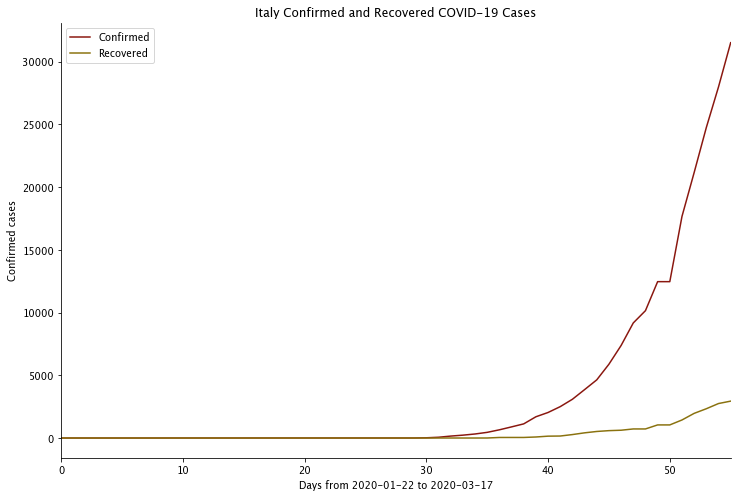

In [220]:
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
fig, ax = plt.subplots(figsize=(12, 8))

df_country = df_confirmed.loc[(df_confirmed['Country/Region'] == 'Italy') ]
df_country.reset_index()['Cases'].plot(label='Confirmed')
df_country = df_recovered.loc[(df_recovered['Country/Region'] == 'Italy') ]
df_country.reset_index()['Cases'].plot(label='Recovered')

ax.set(title='Italy Confirmed and Recovered COVID-19 Cases',
       xlabel='Days from {} to {}'.format(min_date_string, max_date_string),
       ylabel='Confirmed cases')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.legend(loc=0)

sns.despine();

#### Curve Fitting

[   6.05534343 -163.10417554  636.12431942]


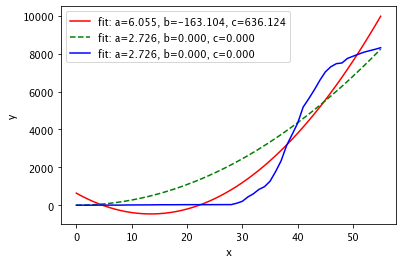

In [219]:
from scipy.optimize import curve_fit
import math

def func(x, a, b, c):
    return a*x**2 + b*x + c

df_country = df_confirmed.loc[(df_confirmed['Country/Region'] == 'Korea, South') ].copy(deep=True)
df_country = df_country.reset_index()
ydata = df_country['Cases']
xdata = df_country.index

popt, pcov = curve_fit(func, xdata, ydata)
print(popt)

plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
print(popt)

plt.plot(xdata, func(xdata, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.plot(xdata, ydata, 'b-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show();

#### Try Sigmoid

[ 1.         -4.50916987]


/Users/jayurbain/anaconda3/envs/pytorch_rl/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning:

overflow encountered in exp



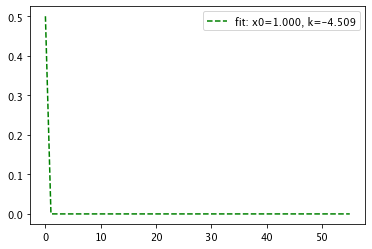

In [255]:
import numpy as np
import pylab
from scipy.optimize import curve_fit
from sklearn import preprocessing

def sigmoid(x, x0, k):
     y = 1 / (1 + np.exp(-(k*x**2 + k*x)))
     return y

min_max_scaler = preprocessing.MinMaxScaler()

df_country = df_confirmed.loc[(df_confirmed['Country/Region'] == 'Korea, South') ].copy(deep=True)
df_country = df_country.reset_index()
ydata = df_country['Cases']
ymax = np.max(ydata) 
ymin = np.min(ydata)
ydata = (ydata - ymin)/(ymax - ymin)
# print(ydata)

xdata = df_country.index

popt, pcov = curve_fit(sigmoid, xdata, ydata)
print(popt)
# print(sigmoid(xdata, *popt))
plt.plot(xdata, sigmoid(xdata, *popt), 'g--',
         label='fit: x0=%5.3f, k=%5.3f' % tuple(popt))

# pylab.plot(xdata, ydata, label='data')
# pylab.plot(xdata, sigmoid(xdata, *popt), label='fit')
#pylab.ylim(0, 1.05)
pylab.legend(loc='best')
pylab.show()